This notebook is to compare sets of weights in NN architectures with different activation functions

In [ ]:
%reset

In [88]:
%run './Functions.ipynb'

### Sigmoid

R2 predicted vs observed is 0.92


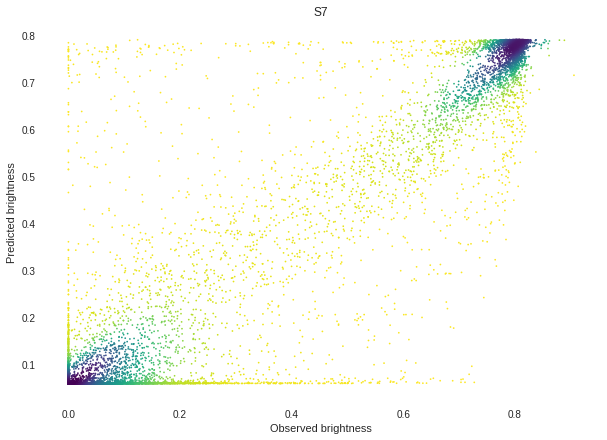

In [210]:
model_1 = Sequential()
model_1.add(Dense(2, activation='sigmoid', input_dim=data.shape[1], kernel_initializer='random_uniform'))
model_1.add(Dense(100, activation='sigmoid', kernel_initializer='random_uniform'))
model_1.add(Dense(100, activation='sigmoid', kernel_initializer='random_uniform'))
model_1.add(Dense(100, activation='sigmoid', kernel_initializer='random_uniform'))
model_1.add(Dense(100, activation='sigmoid', kernel_initializer='random_uniform'))
model_1.add(Dense(1, activation='sigmoid', kernel_initializer='random_uniform'))

model_1.compile(optimizer='adagrad',
              loss='mean_squared_error',
              verbose=0)

model_1.fit(data, labels, epochs=500, batch_size=500, shuffle=True, verbose=0)
weights[1]=model_1.layers[0].get_weights()[0]
intermediate_weights[1]=model_1.layers[1].get_weights()[0]

predicted_1 = model_1.predict(data)

_,_,R,_,_=stats.linregress(labels, predicted_1.flatten())
print ('R2 predicted vs observed is %.2f') % R

plt.figure(figsize=[10,7])
density_plot(labels[:10000], predicted_1.flatten()[:10000])

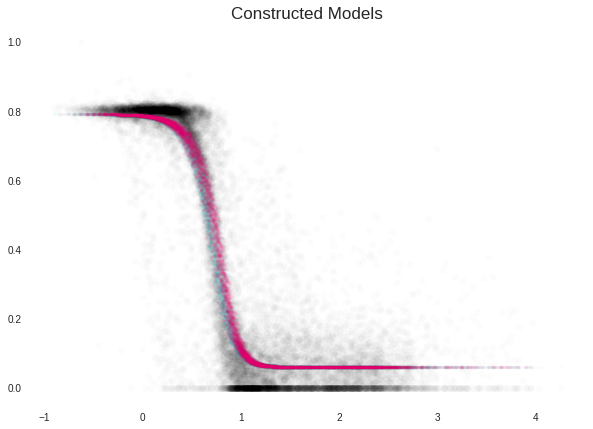

In [211]:
plt.figure(figsize=[10,7])
plt.plot(data.dot(weights[1][:,0]), labels, 'ok', alpha = 0.01)
plt.plot(data.dot(weights[1][:,0]), predicted_1, '.', c='#36D1C4', alpha = 0.03)
plt.plot(data.dot(weights[1][:,1]), predicted_1, '.', c='#FF006C', alpha = 0.03)
plt.title('Constructed Models', fontsize=17);

### TanH

R2 predicted vs observed is 0.93


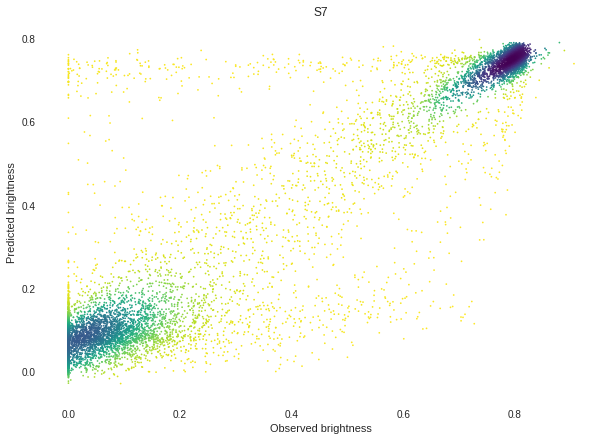

In [246]:
model_2 = Sequential()
model_2.add(Dense(2, activation='tanh', input_dim=data.shape[1], kernel_initializer='random_uniform'))
model_2.add(Dense(100, activation='tanh', kernel_initializer='random_uniform'))
model_2.add(Dense(100, activation='tanh', kernel_initializer='random_uniform'))
model_2.add(Dense(100, activation='tanh', kernel_initializer='random_uniform'))
model_2.add(Dense(100, activation='tanh', kernel_initializer='random_uniform'))
model_2.add(Dense(1, activation='tanh', kernel_initializer='random_uniform'))

model_2.compile(optimizer='adagrad',
              loss='mean_squared_error',
              verbose=0)

model_2.fit(data, labels, epochs=500, batch_size=500, shuffle=True, verbose=0)
weights[2]=model_2.layers[0].get_weights()[0]
intermediate_weights[2]=model_2.layers[1].get_weights()[0]
biases=model_2.layers[0].get_weights()[1]
predicted_2 = model_2.predict(data)

_,_,R,_,_=stats.linregress(labels, predicted_2.flatten())
print ('R2 predicted vs observed is %.2f') % R

plt.figure(figsize=[10,7])
density_plot(labels[:10000], predicted_2.flatten()[:10000])

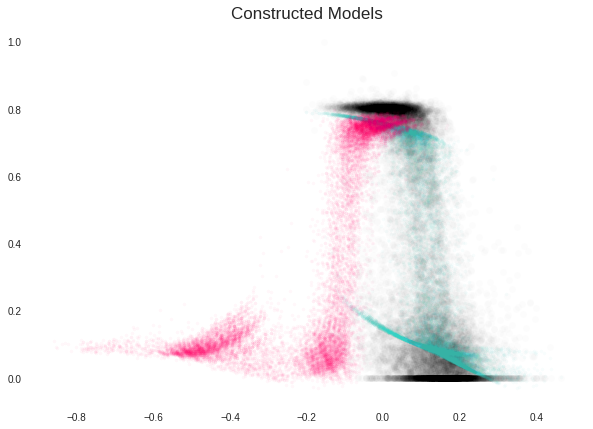

In [247]:
plt.figure(figsize=[10,7])
plt.plot(data.dot(weights[2][:,0]), labels, 'ok', alpha = 0.01)
plt.plot(data.dot(weights[2][:,0]), predicted_2, '.', c='#36D1C4', alpha = 0.03)
plt.plot(data.dot(weights[2][:,1]), predicted_2, '.', c='#FF006C', alpha = 0.03)
plt.title('Constructed Models', fontsize=17);

### ReLU

R2 predicted vs observed is 0.94


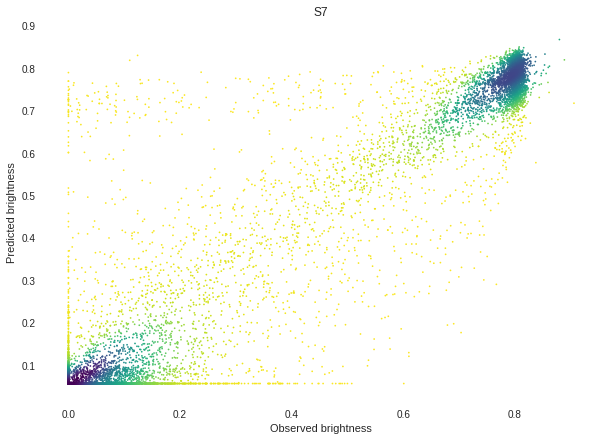

In [249]:
model_3 = Sequential()
model_3.add(Dense(2, activation='relu', input_dim=data.shape[1], kernel_initializer='random_uniform'))
model_3.add(Dense(100, activation='relu', kernel_initializer='random_uniform'))
model_3.add(Dense(100, activation='relu', kernel_initializer='random_uniform'))
model_3.add(Dense(100, activation='relu', kernel_initializer='random_uniform'))
model_3.add(Dense(100, activation='relu', kernel_initializer='random_uniform'))
model_3.add(Dense(1, activation='relu', kernel_initializer='random_uniform'))

model_3.compile(optimizer='adagrad',
              loss='mean_squared_error',
              verbose=0)

model_3.fit(data, labels, epochs=500, batch_size=500, shuffle=True, verbose=0)
weights[3]=model_3.layers[0].get_weights()[0]
intermediate_weights[3]=model_3.layers[1].get_weights()[0]
biases=model_3.layers[0].get_weights()[1]
predicted_3 = model_3.predict(data)

_,_,R,_,_=stats.linregress(labels, predicted_3.flatten())
print ('R2 predicted vs observed is %.2f') % R

plt.figure(figsize=[10,7])
density_plot(labels[:10000], predicted_3.flatten()[:10000])

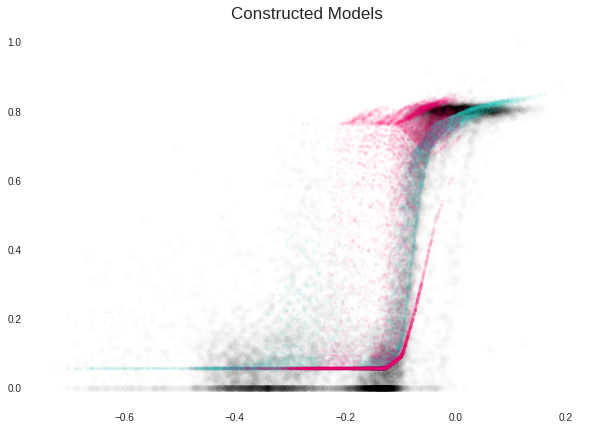

In [250]:
plt.figure(figsize=[10,7])
plt.plot(data.dot(weights[3][:,0]), labels, 'ok', alpha = 0.01)
plt.plot(data.dot(weights[3][:,0]), predicted_3, '.', c='#36D1C4', alpha = 0.03)
plt.plot(data.dot(weights[3][:,1]), predicted_3, '.', c='#FF006C', alpha = 0.03)
plt.title('Constructed Models', fontsize=17);

# Comparison

In [220]:
def make_table(chunk, model, neuron=0):
    index = set([x[-1] for x in unique_mutations[chunk]])
    columns = set([int(x[:-1]) for x in unique_mutations[chunk]])
    df = pd.DataFrame(index=sorted(index), columns=columns).astype(float)
    
    for i in range(len(weights[model])):
        position = unique_mutations[chunk][i][:-1]
        mutation = unique_mutations[chunk][i][-1]
        df[int(position)][mutation] = (weights[model][i][neuron]).astype(float)

        
    return df

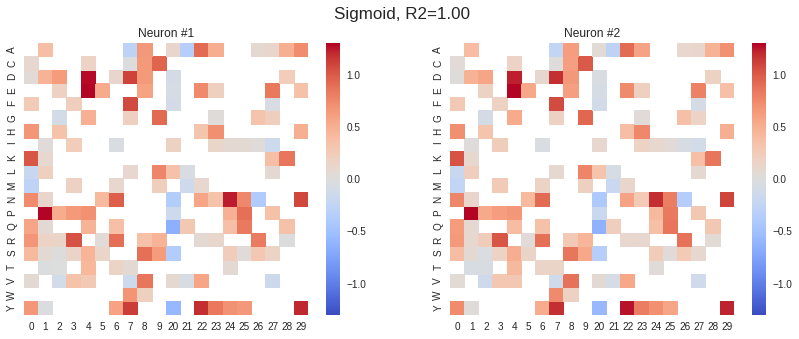

In [236]:
_,_,R,_,_ = stats.linregress(weights[1][:,0].flatten(),weights[1][:,1].flatten())
plt.figure(figsize=[14,5])
plt.suptitle('Sigmoid, R2=%.2f' % R, fontsize=17)
for i in range(2):
    df=make_table('S7',model=1,neuron=i)
    plt.subplot(1,2,i+1)
    plt.title('Neuron #%d' %(i+1))
    sns.heatmap(df, cmap='coolwarm', mask=df.isnull(), vmax=1.3, vmin=-1.3);

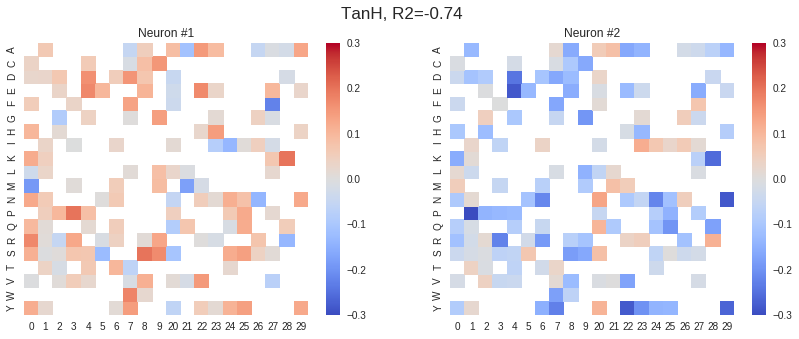

In [252]:
_,_,R,_,_ = stats.linregress(weights[2][:,0].flatten(),weights[2][:,1].flatten())

plt.figure(figsize=[14,5])
plt.suptitle('TanH, R2=%.2f' % R, fontsize=17)
for i in range(2):
    df=make_table('S7', model=2, neuron=i)
    plt.subplot(1,2,i+1)
    plt.title('Neuron #%d' %(i+1))
    sns.heatmap(df, cmap='coolwarm', mask=df.isnull(), vmin=-0.3, vmax=0.3);

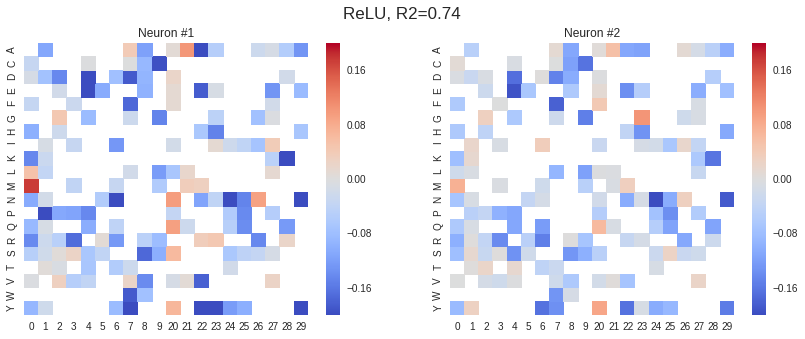

In [253]:
_,_,R,_,_ = stats.linregress(weights[3][:,0].flatten(),weights[3][:,1].flatten())

plt.figure(figsize=[14,5])
plt.suptitle('ReLU, R2=%.2f' % R,fontsize=17)
for i in range(2):
    df=make_table('S7', model=3, neuron=i)
    plt.subplot(1,2,i+1)
    plt.title('Neuron #%d' %(i+1))
    sns.heatmap(df, cmap='coolwarm', mask=df.isnull(), vmax=0.2, vmin=-0.2);

In [35]:
data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])